In [20]:
import os
import re
import csv
import numpy as np


# preapre CSV

In [21]:
results_path = "/Users/u7826985/Projects/Nvidia/results/a100_target/100taxa_diff_trees_1M_sites"
output_csv = "/Users/u7826985/Projects/Nvidia/results/a100_target/100taxa_diff_trees_1M_sites/results.csv"
compare_path= "/Users/u7826985/Projects/Nvidia/results/composite_hadamard_optimization/100taxa_diff_trees_1M_sites"

In [22]:
# Regex to capture the RESULT line
pattern = re.compile(
    r"\[RESULT\]\s*backend=(\w+)\s+taxa=(\d+)\s+sites=(\d+)\s+patterns=(\d+)\s+time=([\d\.e\+\-]+)s\s+likelihood=([\-.\deE]+)"
)


In [23]:
data = []

In [24]:
#read files in results_path

def read_files_in_directory(directory, unique_name=""):
    for i in range(1, 11):
        tree_folder = f"{directory}/tree_{i}"
        files = os.listdir(tree_folder)
        for file in files:
            if file.endswith('.txt'):
                print(f"Reading file: {file}")
                with open(f'{tree_folder}/{file}', 'r') as f:
                    #get treefile name from the txt file name
                    tree_file_name = file.split("_")[3] + "_" + file.split("_")[4]
                    # detect file name contains "a100"
                    a100 = False
                    transposed = False
                    if "a100" in file:
                        a100 = True
    
                
                    if "transpose" in file:
                        transposed = True
                        
                        
                    for line in f:
                        match = pattern.search(line)
                        if match:
                            backend, taxa, sites, patterns, time, likelihood = match.groups()
                            if a100:
                                backend += "_A100"
                            else:
                                backend += "_V100"
                            if transposed:
                                backend += "_transposed"
                                
                            if taxa != "100":
                                continue
                            backend += unique_name
                            data.append([backend, taxa, sites, patterns, likelihood, time, tree_file_name])
    
                            # Write to CSV
                            # with open(output_csv, 'w', newline='') as csvfile:
                            #     writer = csv.writer(csvfile)
                            #     writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time"])
                            #     writer.writerows(data)

    print(f"Extracted {len(data)} results to {output_csv}")



In [25]:
read_files_in_directory(results_path, unique_name="_set_target_a100")
read_files_in_directory(compare_path)

Reading file: output_run_ci_tree_1_1000000_dna_openacc_a100.txt
Reading file: output_run_ci_tree_1_1000000_dna_openacc_transpose_a100.txt
Reading file: output_run_ci_tree_2_1000000_dna_openacc_a100.txt
Reading file: output_run_ci_tree_2_1000000_dna_openacc_transpose_a100.txt
Reading file: output_run_ci_tree_3_1000000_dna_openacc_transpose_a100.txt
Reading file: output_run_ci_tree_3_1000000_dna_openacc_a100.txt
Reading file: output_run_ci_tree_4_1000000_dna_openacc_a100.txt
Reading file: output_run_ci_tree_4_1000000_dna_openacc_transpose_a100.txt
Reading file: output_run_ci_tree_5_1000000_dna_openacc_transpose_a100.txt
Reading file: output_run_ci_tree_5_1000000_dna_openacc_a100.txt
Reading file: output_run_ci_tree_6_1000000_dna_openacc_a100.txt
Reading file: output_run_ci_tree_6_1000000_dna_openacc_transpose_a100.txt
Reading file: output_run_ci_tree_7_1000000_dna_openacc_transpose_a100.txt
Reading file: output_run_ci_tree_7_1000000_dna_openacc_a100.txt
Reading file: output_run_ci_tree_8

In [26]:
print(data)

[['OPENACC_A100_set_target_a100', '100', '1000000', '1000000', '-70051678.096398830413818', '1.416627891000000', 'tree_1'], ['OPENACC_A100_transposed_set_target_a100', '100', '1000000', '1000000', '-70051678.096398830413818', '1.305632872000000', 'tree_1'], ['OPENACC_A100_set_target_a100', '100', '1000000', '1000000', '-62357359.211786963045597', '1.321199029000000', 'tree_2'], ['OPENACC_A100_transposed_set_target_a100', '100', '1000000', '1000000', '-62357359.211786963045597', '1.419271308000000', 'tree_2'], ['OPENACC_A100_transposed_set_target_a100', '100', '1000000', '1000000', '-68988749.108756780624390', '1.314863256000000', 'tree_3'], ['OPENACC_A100_set_target_a100', '100', '1000000', '1000000', '-68988749.108756780624390', '1.316916165000000', 'tree_3'], ['OPENACC_A100_set_target_a100', '100', '1000000', '1000000', '-66676166.743556618690491', '1.295281935000000', 'tree_4'], ['OPENACC_A100_transposed_set_target_a100', '100', '1000000', '1000000', '-66676166.743556618690491', '1.

In [27]:
alignment_pattern = re.compile(r"Alignment has (\d+) sequences with (\d+) columns, (\d+) distinct patterns")
likelihood_pattern = re.compile(r"Initial log-likelihood:\s+([-0-9.]+).*?took ([0-9.]+) wall-clock sec")

# Data list
# data = []


In [28]:
# add iqtree results
iqtree_results_path = results_path

def read_iqtree_results(directory):
    for i in range(1, 11):
        tree_folder = f"{directory}/tree_{i}"
        files = os.listdir(tree_folder)
        for file in files:
            if file.endswith('iqtree.log'):
                print(f"Reading IQ-TREE file: {file}")
                with open(f'{tree_folder}/{file}', 'r') as f:
                    tree_file_name = file.split("_")[3] + "_" + file.split("_")[4]
                    content = f.read()
            
                    # Extract alignment info
                    aln_match = alignment_pattern.search(content)
                    ll_match = likelihood_pattern.search(content)
                    
                    if aln_match and ll_match:
                        taxa = int(aln_match.group(1))
                        sites = int(aln_match.group(2))
                        patterns = int(aln_match.group(3))
                        likelihood = float(ll_match.group(1))
                        time = float(ll_match.group(2))
                        
                        data.append(["IQ-TREE_SIMD", taxa, sites, patterns, likelihood, time, tree_file_name])



    print(f"Extracted {len(data)} IQ-TREE results to {output_csv}")

In [29]:
read_iqtree_results(iqtree_results_path)

Extracted 60 IQ-TREE results to /Users/u7826985/Projects/Nvidia/results/a100_target/100taxa_diff_trees_1M_sites/results.csv


In [30]:
print(data)

[['OPENACC_A100_set_target_a100', '100', '1000000', '1000000', '-70051678.096398830413818', '1.416627891000000', 'tree_1'], ['OPENACC_A100_transposed_set_target_a100', '100', '1000000', '1000000', '-70051678.096398830413818', '1.305632872000000', 'tree_1'], ['OPENACC_A100_set_target_a100', '100', '1000000', '1000000', '-62357359.211786963045597', '1.321199029000000', 'tree_2'], ['OPENACC_A100_transposed_set_target_a100', '100', '1000000', '1000000', '-62357359.211786963045597', '1.419271308000000', 'tree_2'], ['OPENACC_A100_transposed_set_target_a100', '100', '1000000', '1000000', '-68988749.108756780624390', '1.314863256000000', 'tree_3'], ['OPENACC_A100_set_target_a100', '100', '1000000', '1000000', '-68988749.108756780624390', '1.316916165000000', 'tree_3'], ['OPENACC_A100_set_target_a100', '100', '1000000', '1000000', '-66676166.743556618690491', '1.295281935000000', 'tree_4'], ['OPENACC_A100_transposed_set_target_a100', '100', '1000000', '1000000', '-66676166.743556618690491', '1.

In [31]:
# Write to CSV
with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time","treefile"])
    writer.writerows(data)

# Analysis of Results

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
# Read the CSV file into a DataFrame
df = pd.read_csv(output_csv)
# Display the first few rows of the DataFrame
df.head()

,backend,taxa,sites,patterns,likelihood,time,treefile
0,OPENACC_A100_set_target_a100,100,1000000,1000000,-7.005168e+07,1.416628,tree_1
1,OPENACC_A100_transposed_set_target_a100,100,1000000,1000000,-7.005168e+07,1.305633,tree_1
2,OPENACC_A100_set_target_a100,100,1000000,1000000,-6.235736e+07,1.321199,tree_2
3,OPENACC_A100_transposed_set_target_a100,100,1000000,1000000,-6.235736e+07,1.419271,tree_2
4,OPENACC_A100_transposed_set_target_a100,100,1000000,1000000,-6.898875e+07,1.314863,tree_3


In [34]:
df

,backend,taxa,sites,patterns,likelihood,time,treefile
0,OPENACC_A100_set_target_a100,100,1000000,1000000,-7.005168e+07,1.416628,tree_1
1,OPENACC_A100_transposed_set_target_a100,100,1000000,1000000,-7.005168e+07,1.305633,tree_1
2,OPENACC_A100_set_target_a100,100,1000000,1000000,-6.235736e+07,1.321199,tree_2
3,OPENACC_A100_transposed_set_target_a100,100,1000000,1000000,-6.235736e+07,1.419271,tree_2
4,OPENACC_A100_transposed_set_target_a100,100,1000000,1000000,-6.898875e+07,1.314863,tree_3
5,OPENACC_A100_set_target_a100,100,1000000,1000000,-6.898875e+07,1.316916,tree_3
6,OPENACC_A100_set_target_a100,100,1000000,1000000,-6.667617e+07,1.295282,tree_4
7,OPENACC_A100_transposed_set_target_a100,100,1000000,1000000,-6.667617e+07,1.288785,tree_4
8,OPENACC_A100_transposed_set_target_a100,100,1000000,1000000,-6.617868e+07,1.334911,tree_5
9,OPENACC_A100_set_target_a100,100,1000000,1000000,-6.617868e+07,1.334558,tree_5


In [35]:
groups = df.groupby('treefile')

In [36]:
def _basename(s):
    return os.path.basename(str(s))

def prepare(df):
    out = df.copy()
    # standardize column names if needed
    cols = {c.lower(): c for c in df.columns}
    # Expect columns named like 'tree_file', 'backend', 'time'
    # If user had different casing, map it:
    def find(colname):
        return next((c for c in df.columns if c.lower() == colname), colname)
    tree_col = find('treefile')
    backend_col = find('backend')
    time_col = find('time')

    out['treefile'] = out[tree_col].astype(str)
    out['backend']   = out[backend_col].astype(str)
    out['time']      = pd.to_numeric(out[time_col], errors='coerce')

    out['tree_key']  = out['treefile']
    # Order tree keys by natural sort on any numbers inside (helps readability)
    def _nat_key(s):
        return [int(t) if t.isdigit() else t for t in re.split(r'(\d+)', s)]
    tree_order = sorted(out['tree_key'].unique(), key=_nat_key)
    out['tree_key'] = pd.Categorical(out['tree_key'], categories=tree_order, ordered=True)

    # Optional: order backends (put CPU first, then GPU variants)
    backend_order = sorted(out['backend'].unique(), key=lambda b: (('cpu' not in b.lower()), b.lower()))
    out['backend'] = pd.Categorical(out['backend'], categories=backend_order, ordered=True)
    return out

dfp = prepare(df)

# --- 1) Grouped bars: mean time per backend for each tree ---------------------
def plot_grouped_bars(dfp, logy=True):
    pivot = dfp.pivot_table(index='tree_key', columns='backend', values='time', aggfunc='mean')
    ax = pivot.plot(kind='bar', figsize=(10, 5))
    ax.set_xlabel("Tree file")
    ax.set_ylabel("Runtime (s)")
    ax.set_title("runtime per tree")
    if logy:
        ax.set_yscale('log')
    ax.legend(title="Backend")
    plt.tight_layout()
    plt.show()

# --- 2) Dot plot: each run as a point (great with log scale) ------------------
def plot_dot(dfp, logy=True):
    fig, ax = plt.subplots(figsize=(10, 5))
    backends = list(dfp['backend'].cat.categories) if hasattr(dfp['backend'], 'cat') else sorted(dfp['backend'].unique())
    x_pos = np.arange(len(backends))

    jitter = 0.15
    for i, b in enumerate(backends):
        y = dfp.loc[dfp['backend'] == b, 'time'].values
        x = np.random.uniform(i - jitter, i + jitter, size=len(y))
        ax.scatter(x, y, s=18, alpha=0.8)  # no explicit colors
    ax.set_xticks(x_pos)
    ax.set_xticklabels(backends, rotation=0)
    ax.set_xlabel("Backend")
    ax.set_ylabel("Runtime (s)")
    ax.set_title("Per-run runtimes by backend")
    if logy:
        ax.set_yscale('log')
    ax.grid(True, which='both', axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

# --- 3) Distribution view: boxplot by backend ---------------------------------
def plot_box(dfp, logy=True):
    fig, ax = plt.subplots(figsize=(10, 5))
    dfp.boxplot(column='time', by='backend', ax=ax)  # default style, no colors set
    ax.set_title("Runtime distribution by backend")
    ax.set_ylabel("Runtime (s)")
    if logy:
        ax.set_yscale('log')
    plt.suptitle("")  # remove automatic super-title
    plt.tight_layout()
    plt.show()

# --- 4) Compact heatmap: trees x backends (mean time) -------------------------
def plot_heatmap(dfp, log=True):
    mat = dfp.pivot_table(index='tree_key', columns='backend', values='time', aggfunc='mean')
    data = np.log10(mat.values) if log else mat.values

    fig, ax = plt.subplots(figsize=(10, max(4, 0.4*len(mat))))
    im = ax.imshow(data, aspect='auto')  # default colormap, no color specified

    # ticks / labels
    ax.set_yticks(np.arange(mat.shape[0]))
    ax.set_yticklabels(mat.index.astype(str))
    ax.set_xticks(np.arange(mat.shape[1]))
    ax.set_xticklabels(mat.columns.astype(str), rotation=45, ha='right')
    ax.set_xlabel('Backend')
    ax.set_ylabel('Tree file')
    ax.set_title('Mean runtime heatmap (log10 seconds)' if log else 'Mean runtime heatmap (seconds)')
    fig.colorbar(im, ax=ax, label=('log10(s)' if log else 's'))
    plt.tight_layout()
    plt.show()

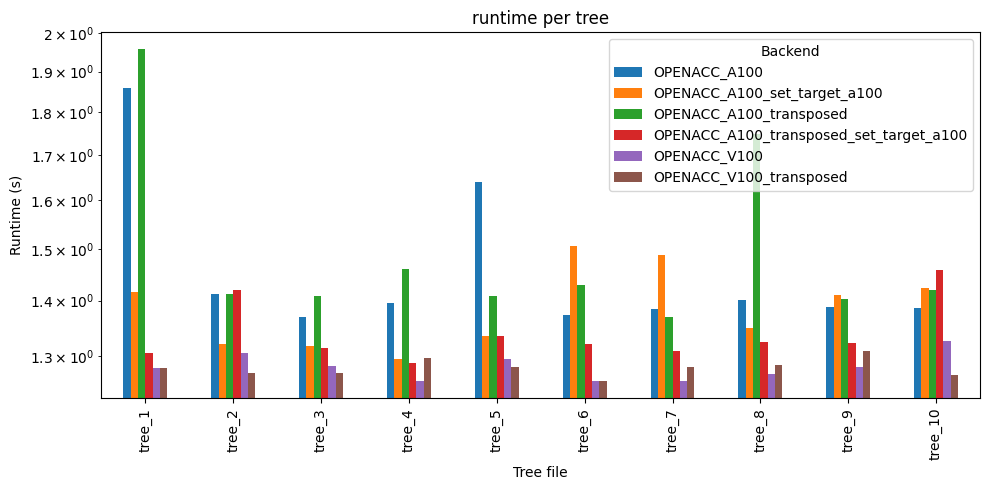

In [37]:
plot_grouped_bars(dfp, logy=True)

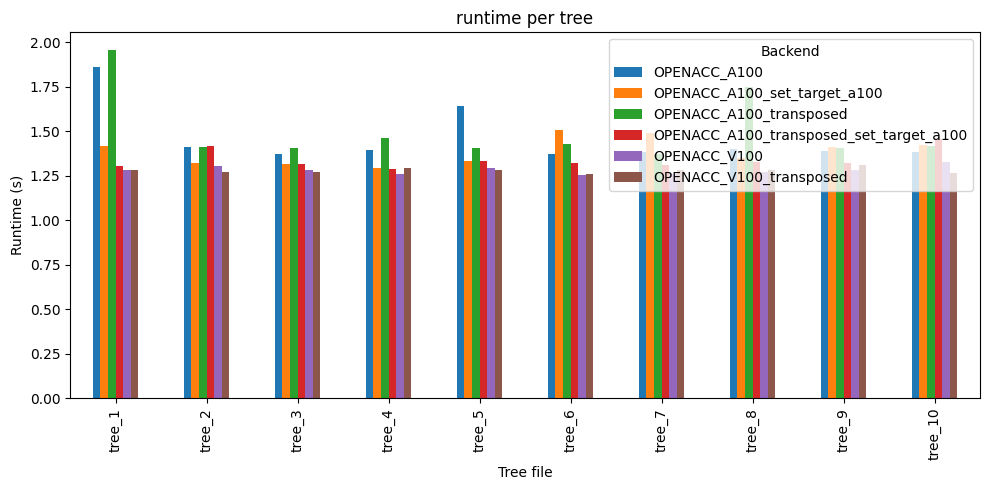

In [38]:
plot_grouped_bars(dfp, logy=False)
